In [22]:
import pandas as pd
import sklearn
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, make_scorer, f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [20]:
df = pd.read_csv("./../clean_data.csv")

numerical_columns = df.select_dtypes(include=['float64']).columns

x = df[numerical_columns]
y = df['churn']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


# Balancing data
ros = RandomOverSampler(random_state=42)
X_oversampled, y_oversampled = ros.fit_resample(X_train, y_train)

# Display class distribution after oversampling
print("\nClass distribution after oversampling:")
print(pd.Series(y_oversampled).value_counts())

# Apply RandomUnderSampler to address class imbalance
rus = RandomUnderSampler(random_state=42)
X_undersampled, y_undersampled = rus.fit_resample(X_train, y_train)

# Display class distribution after undersampling
print("\nClass distribution after undersampling:")
print(pd.Series(y_undersampled).value_counts())

X_oversampled


Class distribution after oversampling:
No     3273
Yes    3273
Name: churn, dtype: int64

Class distribution after undersampling:
No     519
Yes    519
Name: churn, dtype: int64


,accountlength,numbervmailmessages,totaldayminutes,totaldaycalls,totalevecalls,totalevecharge,totalnightminutes,totalnightcalls,totalintlcalls,totalintlcharge,numbercustomerservicecalls
0,0.384259,0.000000,0.537786,0.396552,0.658120,0.890114,0.657114,0.316239,0.3,0.270455,0.0
1,0.459605,0.291667,0.541863,0.379310,0.410256,0.119732,0.597468,0.666667,0.2,0.515909,0.4
2,0.532407,0.479167,0.732204,0.310345,0.675214,0.287909,0.758747,0.529915,0.2,0.595455,0.4
3,0.680556,0.000000,0.661963,0.431034,0.470085,0.444269,0.443519,0.316239,0.3,0.250000,0.4
4,0.277778,0.000000,0.674506,0.724138,0.290598,0.494683,0.403199,0.333333,0.1,0.368182,0.0
...,...,...,...,...,...,...,...,...,...,...,...
6541,0.375000,0.000000,0.973032,0.267241,0.666667,0.520284,0.723092,0.512821,0.5,0.520455,0.0
6542,0.662037,0.000000,0.132016,0.646552,0.367521,0.080740,0.409530,0.487179,0.6,0.372727,0.8
6543,0.509259,0.000000,0.438696,0.043103,0.094017,0.724301,0.432189,0.521368,0.1,0.406818,0.4
6544,0.680556,0.000000,0.671057,0.336207,0.247863,0.450965,0.240586,0.470085,0.1,0.459091,0.0


Accuracy: 0.8470464135021097

Confusion Matrix:
 [[746  75]
 [ 70  57]]

Classification Report:
               precision    recall  f1-score   support

          No       0.91      0.91      0.91       821
         Yes       0.43      0.45      0.44       127

    accuracy                           0.85       948
   macro avg       0.67      0.68      0.68       948
weighted avg       0.85      0.85      0.85       948


Recall: 0.8470464135021097

Precision: 0.4318181818181818

F1: 0.44015444015444016


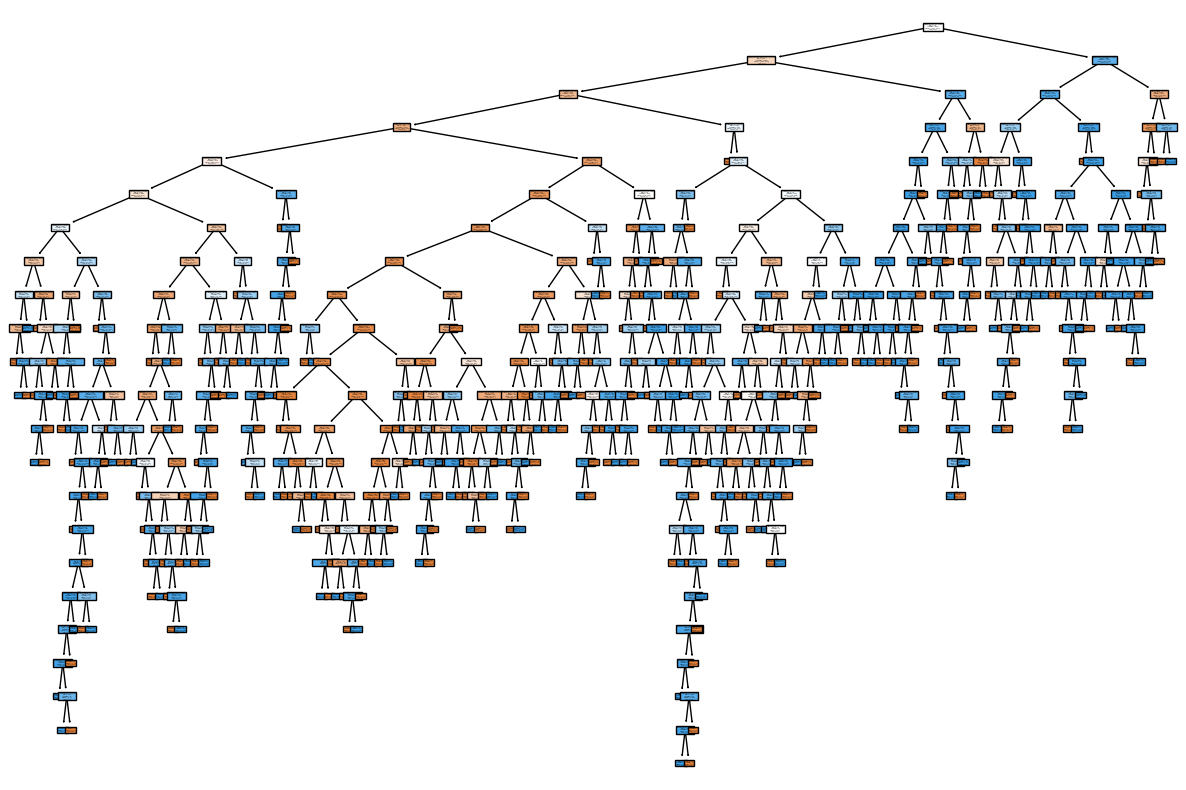

In [25]:
# DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_oversampled, y_oversampled)

y_pred = dt_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

print("\nRecall:", accuracy_score(y_test, y_pred)) #, pos_label='Yes'))
print("\nPrecision:", precision_score(y_test, y_pred, pos_label='Yes'))
print("\nF1:", f1_score(y_test, y_pred, pos_label='Yes'))


# Visualization
plt.figure(figsize=(15, 10))
tree.plot_tree(dt_model, filled=True, feature_names=X_oversampled.columns, class_names=df['churn'].unique())
plt.show()

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters for Accuracy: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'splitter': 'random'}
Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters for F1 Score: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'splitter': 'random'}


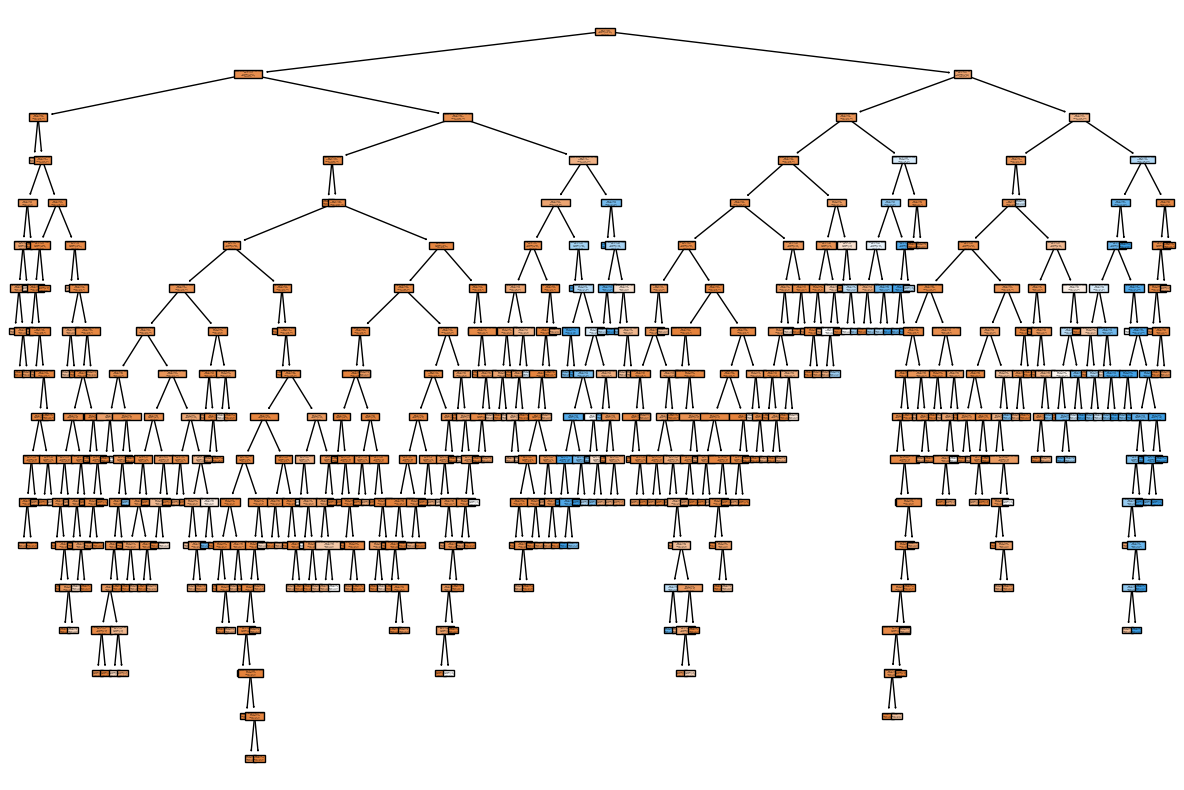

In [26]:
# Define the parameter grid for Decision Tree
dt_params = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a Decision Tree model
dt_classifier = DecisionTreeClassifier(random_state=42)
cv_strategy = KFold(n_splits=5, shuffle=True, random_state=42)
f1 = sklearn.metrics.make_scorer(sklearn.metrics.f1_score, average='micro')

# Create GridSearchCV for accuracy
grid_dt_accuracy = GridSearchCV(estimator=dt_classifier, param_grid=dt_params, cv=cv_strategy, n_jobs=5, verbose=1, scoring='accuracy')
grid_dt_accuracy.fit(X_train, y_train)

# Print the best parameters for accuracy
print("Best Parameters for Accuracy:", grid_dt_accuracy.best_params_)

# Create GridSearchCV for F1 Score
grid_dt_f1 = GridSearchCV(estimator=dt_classifier, param_grid=dt_params, cv=cv_strategy, n_jobs=5, verbose=1, scoring=f1)
grid_dt_f1.fit(X_train, y_train)

# Print the best parameters for F1 Score
print("Best Parameters for F1 Score:", grid_dt_f1.best_params_)


best_dt_model = grid_dt_accuracy.best_estimator_

# Visualization
plt.figure(figsize=(15, 10))
tree.plot_tree(best_dt_model, filled=True, feature_names=X_oversampled.columns, class_names=df['churn'].unique())
plt.show()
